In [1]:
# Home prices in India , 
#Given these home prices find out prices find out
#prices of homes whoes area is, 
# 3300 square feet ?
#5000 square feet ?


In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

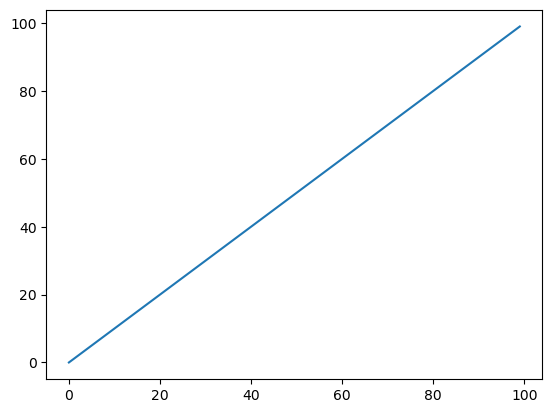

In [4]:
%matplotlib inline
plt.plot(range(100))

In [3]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


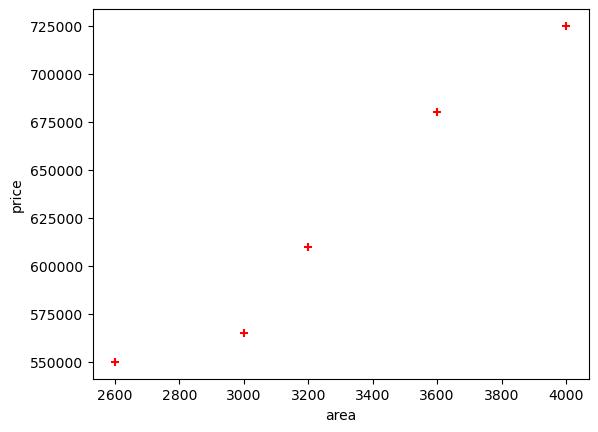

In [5]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [7]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [9]:
price=df.price
price


0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [11]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [13]:
#(1) Predict price of a home with area = 3300 sqr ft
reg.predict([[3300]])

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [15]:
reg.coef_

array([135.78767123])

In [17]:
reg.intercept_

180616.43835616432

In [19]:
# Y = m * X + b (m is coefficient and b is intercept)
3300*135.78767123 + 180616.43835616432

628715.7534151643

In [21]:
# Predict price of a home with area = 5000 sqr ft
reg.predict([[5000]])

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [23]:
# Generate CSV file with list of home price predictions..
area_df = pd.read_csv("areas.csv")
area_df.head(3)


,area
0,1000
1,1500
2,2300


In [25]:
p = reg.predict(area_df)
p


array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [29]:
area_df['prices']=p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [31]:
area_df.to_csv("prediction.csv")